In [2]:
import numpy as np
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import time
import pandas as pd

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

font_size = 10

# matplotlib.rcParams.keys()
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign
centimeter = 1/2.54  # centimeter in inches

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=400, dpi_save=400, figsize=(6,6), fontsize = 10, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==1.1.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.7


In [5]:
from _utils import get_adata, update_celltype,set_cell2loc_palette
import edge


In [6]:
sample_list=['CDQ_C3','CDQ_D4','CDQ_E3','CXF_D1','HX_D3','LJT_F6','TJ_E4','GXY_F3','ZZW_F5','ZH1_B1B2','ZH2_B3B4','ZH3_C1C2','ZH4_C3C4','LXS_D3D4','LXS_D5D6']
adata_paths = [r'/hwfssz1/ST_HEALTH/P20Z10200N0170/jiangyongchao/project/HX_lung/cell2loc/'+pat_id+'_bin100.leiden.cell2location.gzip.h5ad' 
               for pat_id in sample_list]
adata_fnames = dict(zip(sample_list, adata_paths))


In [7]:
pat_id = 'ZH2_B3B4' 
adata=get_adata(adata_fnames[pat_id], log=True)

normalizing counts per cell
    finished (0:00:05)


In [8]:
adata

AnnData object with n_obs × n_vars = 49675 × 13336
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    layers: 'count', 'no

In [9]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']
update_celltype(adata,celltype_list,min_frac_ct=1.2, update_cell2loc=True)


In [10]:
adata

AnnData object with n_obs × n_vars = 49675 × 13336
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf', 'cell_type_update'
    

In [11]:
adata.obsm['cell_type_update']

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,Fibroblast,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update
cell_name,,,,,,,,,,,,,,,,,,,,
0-100,0.010423,0.162406,0.327682,0.059406,0.008624,0.010755,0.027376,0.260304,0.023492,0.002763,0.026831,0.010293,0.006127,0.034363,0.010087,0.019066,7,2,1.258844,AT2_like
0-101,0.008557,0.172930,0.322113,0.053366,0.005771,0.003152,0.023625,0.210763,0.032461,0.003358,0.056578,0.007565,0.005232,0.069069,0.007092,0.018369,7,2,1.528319,AT2_like
0-102,0.005720,0.065524,0.362924,0.027247,0.000410,0.009692,0.008566,0.324296,0.006029,0.001727,0.087198,0.003229,0.006191,0.057509,0.005014,0.028724,7,2,1.119115,NOT_SPEC
0-103,0.003034,0.021424,0.377916,0.029561,0.000717,0.001789,0.004210,0.342724,0.002364,0.002814,0.104734,0.001106,0.006126,0.065760,0.006674,0.029047,7,2,1.102681,NOT_SPEC
0-104,0.005657,0.023927,0.370436,0.034005,0.000141,0.000424,0.005002,0.323636,0.008041,0.009707,0.122732,0.002274,0.005855,0.056977,0.005082,0.026103,7,2,1.144605,NOT_SPEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99-95,0.035246,0.493628,0.015365,0.020502,0.053441,0.043588,0.112741,0.008299,0.059573,0.009205,0.017077,0.039630,0.025441,0.028913,0.024461,0.012890,6,1,4.378442,AT2
99-96,0.034248,0.519188,0.018197,0.018837,0.032834,0.108762,0.097081,0.003638,0.026900,0.009315,0.031800,0.032822,0.014592,0.017724,0.022742,0.011320,5,1,4.773621,AT2
99-97,0.025154,0.562638,0.007596,0.021304,0.016487,0.044836,0.110136,0.004526,0.065476,0.044612,0.001681,0.025773,0.008870,0.032484,0.018650,0.009778,6,1,5.108555,AT2


# Region 1

In [71]:
# small region
im_map = edge.creat_imarray(adata)
area, boundary = edge.find_boundary(im_map,min_thre_binary=110, 
                 max_thre_binary=255, 
                 gaussian_sigma=0)

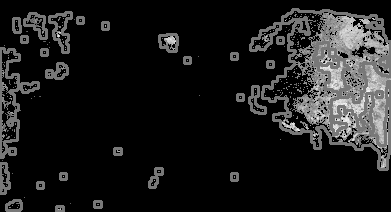

In [72]:
from PIL import Image
import cv2

im_map_raw = im_map.copy()
cv2.drawContours(im_map_raw, boundary, -1, 120, 2)
Image.fromarray(im_map_raw)

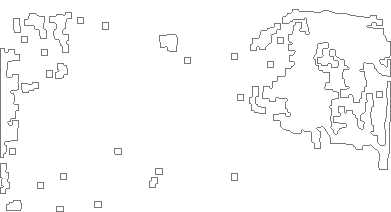

In [73]:
# just show boundary
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, boundary, -1, 120, 1)
Image.fromarray(CntExternalMask)

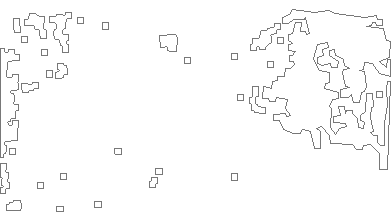

In [74]:
smoothed_b = edge.smooth_boundary(boundary, factor=0.001) # 0.002

CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, smoothed_b, -1, 120, 1)
Image.fromarray(CntExternalMask)

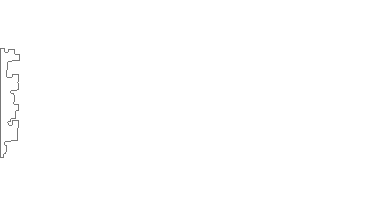

In [75]:
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, [smoothed_b[1]], -1, 120, 1)
Image.fromarray(CntExternalMask)

In [76]:
roi_b_sml = smoothed_b[1]

# Region 2

In [12]:
# large region
im_map = edge.creat_imarray(adata)
area, boundary = edge.find_boundary(im_map,min_thre_binary=160, 
                 max_thre_binary=255, 
                 gaussian_sigma=0)


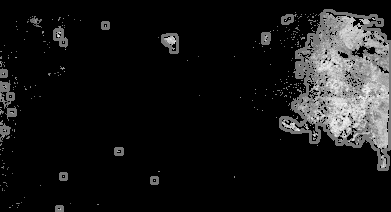

In [13]:
from PIL import Image
import cv2

im_map_raw = im_map.copy()
cv2.drawContours(im_map_raw, boundary, -1, 120, 2)
Image.fromarray(im_map_raw)

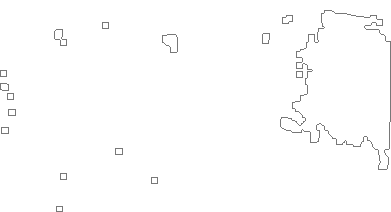

In [14]:
# just show boundary
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, boundary, -1, 120, 1)
Image.fromarray(CntExternalMask)

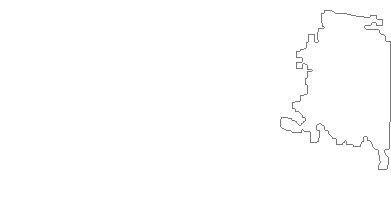

In [104]:
smoothed_b = edge.smooth_boundary([boundary[0]], factor=0.0001, intp=False,n_interp=300) # 0.002

CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, smoothed_b, -1, 120, 1)
Image.fromarray(CntExternalMask)


In [105]:
def _filter_line(bound_ploy, x_left, x_right, y_bottom, y_top):
    """
    x_left < x_right
    y_bottom > y_top
    """
    u_bound = []
    for x,y in zip(bound_ploy.boundary.xy[0],bound_ploy.boundary.xy[1]):
        if (x > x_left and y > y_top) and (x < x_right and y < y_bottom):
            u_bound.append([x,y])
        else:
            u_bound.append([None, None])
    arr = np.array(u_bound)
    return arr

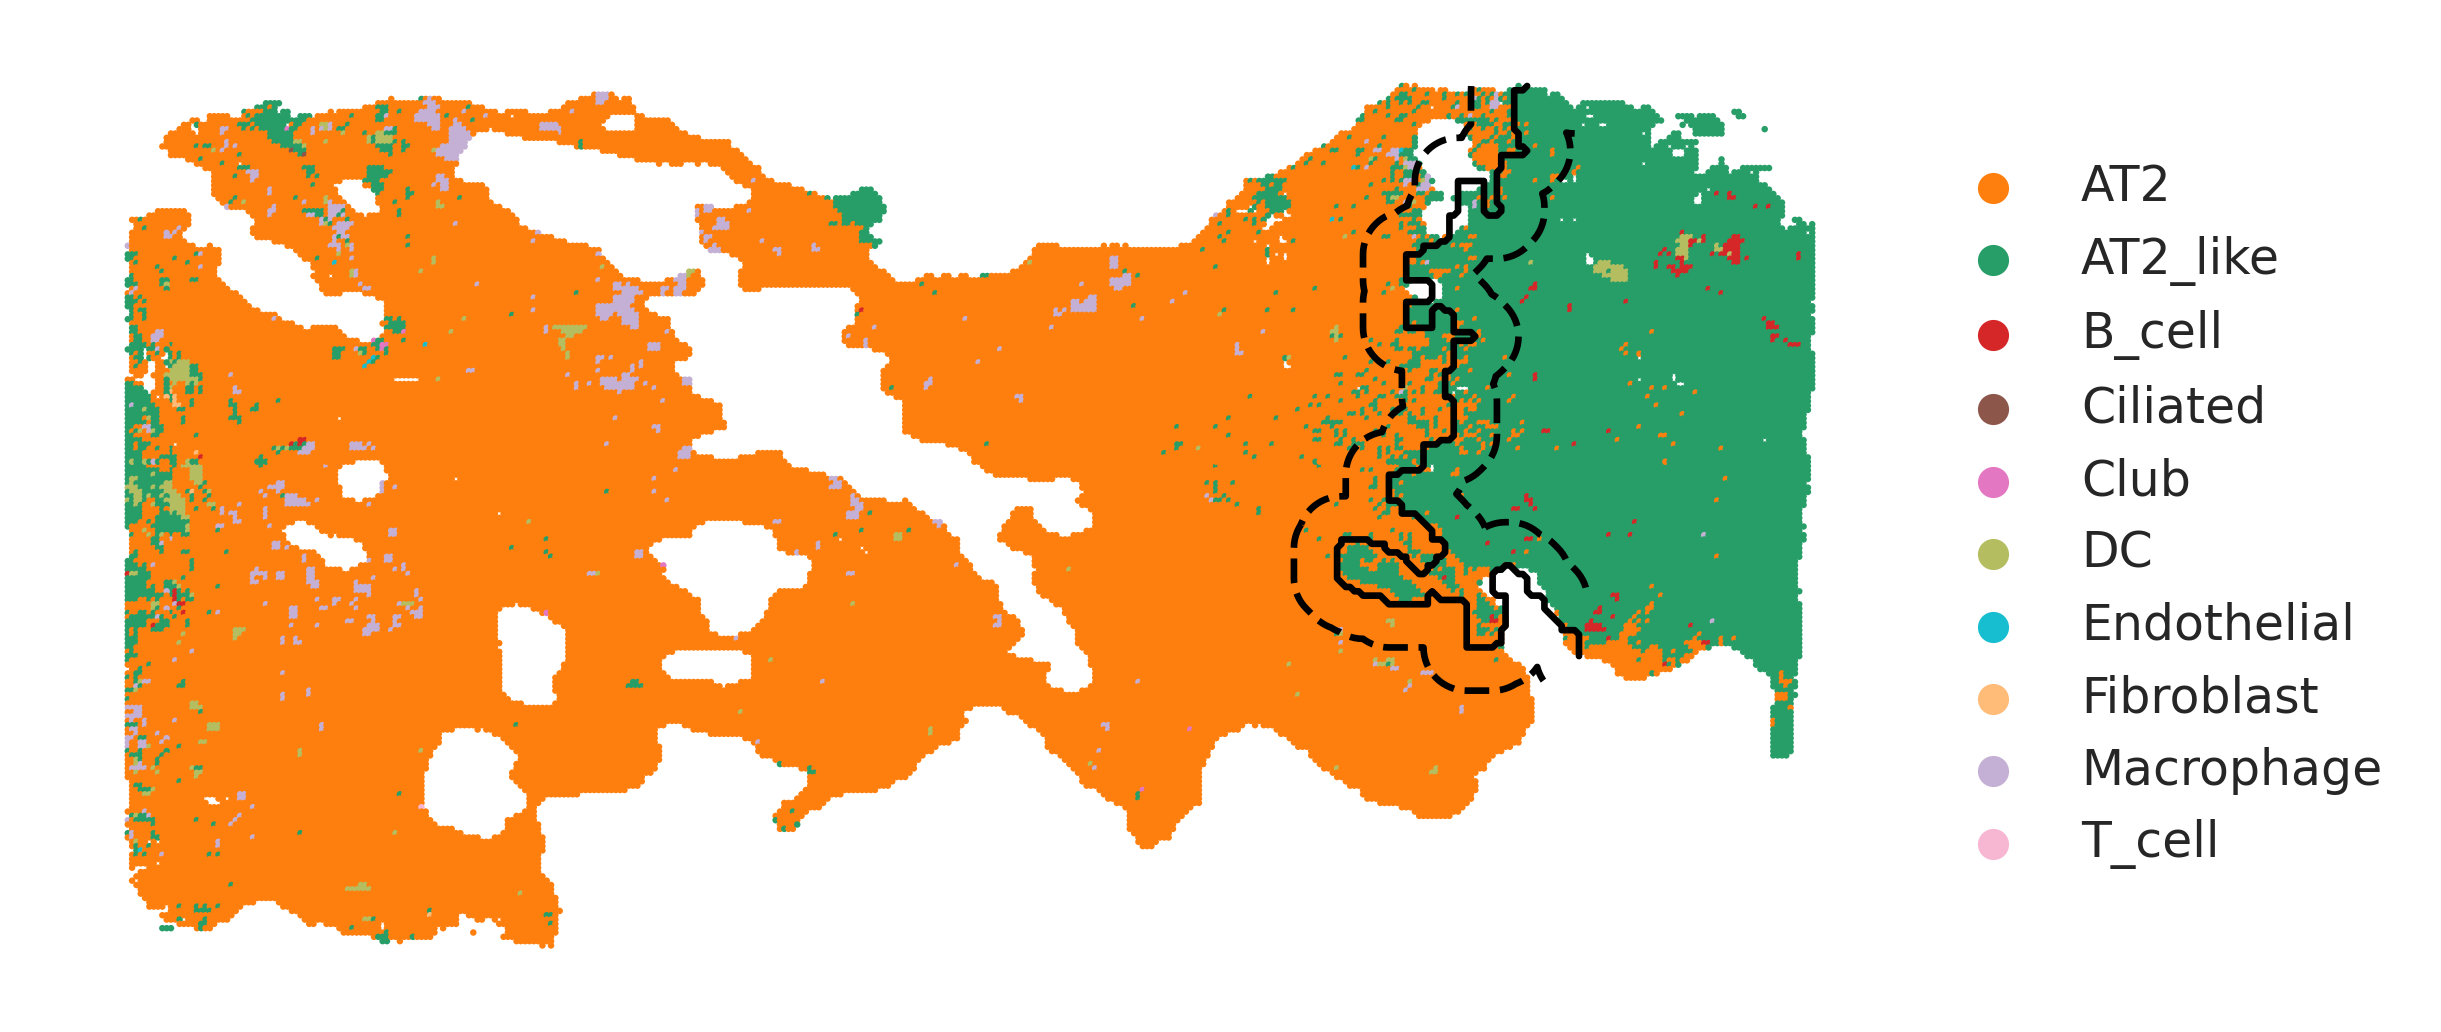

In [106]:
# draw plot to show boundary
# distance = 10, equal to 500 mum
roi_b = smoothed_b[0]
o_b, f_b, b_b = edge.find_distance_boundary(roi_b, distance=10)

fig,ax = plt.subplots(figsize=(6,6))
sc.pl.spatial(adata, color=['cell2location_max'], title='', spot_size=1.5,frameon = False, show=False, ax=ax, palette = set_cell2loc_palette(celltype_list))

x_left, x_right = ax.get_xlim()
y_bottom, y_top = ax.get_ylim()

ob_b = _filter_line(o_b, x_left, x_right-70, y_bottom, y_top+10)

fb_b = _filter_line(f_b, x_left+10, x_right-81, y_bottom-50, y_top+10)
bb_b = _filter_line(b_b, x_left, x_right-72, y_bottom-55, y_top+10)

ax.plot(ob_b[:,0],ob_b[:,1], color='black')
ax.plot(fb_b[:,0],fb_b[:,1], color='black', linestyle='dashed')
ax.plot(bb_b[:,0],bb_b[:,1], color='black', linestyle='dashed')

plt.savefig(f"results/edge/boundary_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

In [107]:
from shapely.geometry import Point
coords = adata.obsm['spatial']
coords_pt = list(map(Point, zip(coords[:,0],coords[:,1])))

def get_pt_btw_boundary(coords_pt, outer_b, in_b):
    return np.array([1 if outer_b.contains(i) and not in_b.contains(i) else 0 for i in coords_pt])

In [108]:


o_b, f_b_p5, b_b_m5 = edge.find_distance_boundary(roi_b, distance=5)
_, f_b_p10, b_b_m10 = edge.find_distance_boundary(roi_b, distance=10)
_, f_b_p15, b_b_m15 = edge.find_distance_boundary(roi_b, distance=15)
_, f_b_p20, b_b_m20 = edge.find_distance_boundary(roi_b, distance=20)

_, f_b_p25, b_b_m25 = edge.find_distance_boundary(roi_b, distance=25)

pt_in_p5_ob = get_pt_btw_boundary(coords_pt, f_b_p5, o_b)
pt_in_p10_p5 = get_pt_btw_boundary(coords_pt, f_b_p10, f_b_p5)
pt_in_p15_p10 = get_pt_btw_boundary(coords_pt, f_b_p15, f_b_p10)
pt_in_p20_p15 = get_pt_btw_boundary(coords_pt, f_b_p20, f_b_p15)
pt_in_p25_p20 = get_pt_btw_boundary(coords_pt, f_b_p25, f_b_p20)

pt_in_m5_ob = get_pt_btw_boundary(coords_pt, o_b, b_b_m5)
pt_in_m10_m5 = get_pt_btw_boundary(coords_pt, b_b_m5, b_b_m10)
pt_in_m15_m10 = get_pt_btw_boundary(coords_pt, b_b_m10, b_b_m15)
pt_in_m20_m15 = get_pt_btw_boundary(coords_pt, b_b_m15, b_b_m20)
pt_in_m25_m20 = get_pt_btw_boundary(coords_pt, b_b_m20, b_b_m25)


In [109]:
adata_p5_ob = adata[pt_in_p5_ob==1,:]
adata_p10_p5 = adata[pt_in_p10_p5==1,:]
adata_p15_p10 = adata[pt_in_p15_p10==1,:]
adata_p20_p15 = adata[pt_in_p20_p15==1,:]

adata_p25_p20 = adata[pt_in_p25_p20==1,:]

adata_m5_ob = adata[pt_in_m5_ob==1,:]
adata_m10_m5 = adata[pt_in_m10_m5==1,:]
adata_m15_m10 = adata[pt_in_m15_m10==1,:]
adata_m20_m15 = adata[pt_in_m20_m15==1,:]

adata_m25_m20 = adata[pt_in_m25_m20==1,:]

In [110]:
adas = [adata_p5_ob, adata_p10_p5, adata_p15_p10, adata_p20_p15,adata_p25_p20, adata_m5_ob, adata_m10_m5, adata_m15_m10, adata_m20_m15,adata_m25_m20]
dist_lab = ['0-5','5-10','10-15','15-20','20-25', '-5-0', '-10--5','-15--10','-20--15','-25--20']
# dist_lab = [-1,-2,-3, -4, 1, 2, 3 , 4]
# orders = ['15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15']

df_cell_type_frac_regs=None
for i, ada in enumerate(adas):
    if i==0:
        df_cell_type_frac = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac['region'] = [dist_lab[i]] * df_cell_type_frac.shape[0]
        df_cell_type_frac_regs = df_cell_type_frac
    else:
        df_cell_type_frac1 = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac1['region'] = [dist_lab[i]] * df_cell_type_frac1.shape[0]
        df_cell_type_frac_regs = pd.concat([df_cell_type_frac_regs, df_cell_type_frac1], ignore_index=True)


In [111]:
import pickle
with open(f'results/edge/adatas_{pat_id}.pkl','wb') as f:
    pickle.dump(adas, f)

In [112]:
df_cell_type_frac_regs

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,...,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update,region
0,0.013166,0.252978,0.365016,0.044277,0.018395,0.044083,0.051014,0.088200,0.035612,0.002928,...,0.012993,0.007715,0.014767,0.013340,0.017964,1,2,1.442879,AT2_like,0-5
1,0.017012,0.389879,0.197336,0.030708,0.027657,0.051558,0.086046,0.056193,0.067501,0.004592,...,0.007688,0.011483,0.004965,0.017385,0.016418,2,1,1.975711,AT2,0-5
2,0.034997,0.367463,0.175573,0.026203,0.015798,0.075583,0.098223,0.054792,0.040223,0.010878,...,0.020741,0.015522,0.013264,0.022169,0.017966,2,1,2.092936,AT2,0-5
3,0.040213,0.458050,0.088226,0.044907,0.051265,0.049547,0.091655,0.024305,0.047720,0.006240,...,0.024049,0.013831,0.008717,0.018426,0.013905,6,1,4.997554,AT2,0-5
4,0.043077,0.466523,0.059886,0.041844,0.038750,0.057959,0.125617,0.011539,0.038695,0.008069,...,0.024645,0.016504,0.016057,0.027329,0.014316,6,1,3.713862,AT2,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13654,0.013338,0.104235,0.525527,0.063580,0.005545,0.002738,0.020126,0.144944,0.007332,0.002068,...,0.003105,0.011125,0.024744,0.007600,0.020646,7,2,3.625729,AT2_like,-25--20
13655,0.021723,0.318644,0.244196,0.057489,0.028135,0.036534,0.057923,0.092618,0.020994,0.008828,...,0.014791,0.015923,0.017179,0.015596,0.016138,2,1,1.304869,AT2,-25--20
13656,0.007715,0.083388,0.464857,0.063686,0.004841,0.011645,0.026307,0.195472,0.012517,0.002421,...,0.003078,0.017057,0.029562,0.010342,0.026408,7,2,2.378129,AT2_like,-25--20
13657,0.004258,0.021722,0.564327,0.043033,0.001507,0.002143,0.008532,0.220709,0.006611,0.001038,...,0.000745,0.007264,0.031139,0.006853,0.028423,7,2,2.556880,AT2_like,-25--20


In [113]:
df_cell_type_frac_regs.to_csv(f"results/edge/cell_boundary_{pat_id}.csv", index=False)

In [114]:
from matplotlib import cm, colors
x = list(map(colors.to_hex, sns.color_palette('pastel')))
print(x)
x = list(map(colors.to_hex, sns.color_palette('bright')))
print(x)


['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']


In [115]:
# bg_f = ['#b9f2f0', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#fffea3', ]
# ln_f = ['#00d7ff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#ffc400', ]
bg_f = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']

In [116]:
sns.color_palette(x)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [117]:
import plotting

In [118]:
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

def plot_show(df_cell_type_frac_regs, val_col, save=True, y_label='Fraction of Cell Type', gene=False, gene_cell_type=None, bg_f=bg_f, ln_f=ln_f):
    
    comp_pairs = [('20-25','15-20'),('15-20','10-15'),('10-15','5-10'),('5-10','0-5'), ('0-5','-5-0'), 
                  ('-5-0','-10--5'), ('-10--5','-15--10'),('-15--10','-20--15'),('-20--15','-25--20')]
    orders = ['20-25','15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15','-25--20']

    fig = plt.figure(figsize=(4.5,3.2))
    gs1 = GridSpec(2, 1, hspace=0.3,height_ratios=[8, 1.2])
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    axa = plotting.boxplot(df_cell_type_frac_regs, 'region', val_col, ax1, comp_pairs,orders=orders, gene=gene,bg_f=bg_f, ln_f=ln_f)

    ax1.axvline(4.5,linewidth=0.8, color='gray', linestyle='dashed',ymax=0.6)
    ax1.tick_params(pad=1)
    ax1.set_xticklabels(
        labels=['-1250 $\mu$m','-1000 $\mu$m','-750 $\mu$m','-500 $\mu$m','-250 $\mu$m','250 $\mu$m','500 $\mu$m','750 $\mu$m','1000 $\mu$m','1250 $\mu$m'], rotation=20,ha='center', va='top')
    ax1.set_xlabel(None)
    ax1.set_ylabel(y_label)
    if not gene:
        ax1.set_title(val_col)
    else:
        ax1.set_title(f'$\it{val_col}$')

    p = patches.FancyArrowPatch((0, 0.5), (1, 0.5), arrowstyle='<|-|>', mutation_scale=10,color='k')
    ax2.add_patch(p)
    ax2.plot([0.5,0.5],[0.5016,0.51],color='k')
    ax2.text(0.15, 0.472, 'Normal', ha='center', va='center')
    ax2.text(0.5, 0.472, 'Boundary', ha='center', va='center')
    ax2.text(0.85, 0.472, 'Tumor',  ha='center', va='center')
    ax2.axis('off')
    sns.despine()
    if save:
        if gene:
            plt.savefig(f"results/edge/{gene_cell_type}_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')
        else:
            plt.savefig(f"results/edge/ct_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20-25 vs. 15-20: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.055e-05 U_stat=6.350e+05
15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.372e-09 U_stat=6.293e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.608e-04 U_stat=5.747e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.157e-19 U_stat=9.120e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.210e-295 U_stat=2.831e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.656e-60 U_stat=2.803e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correc

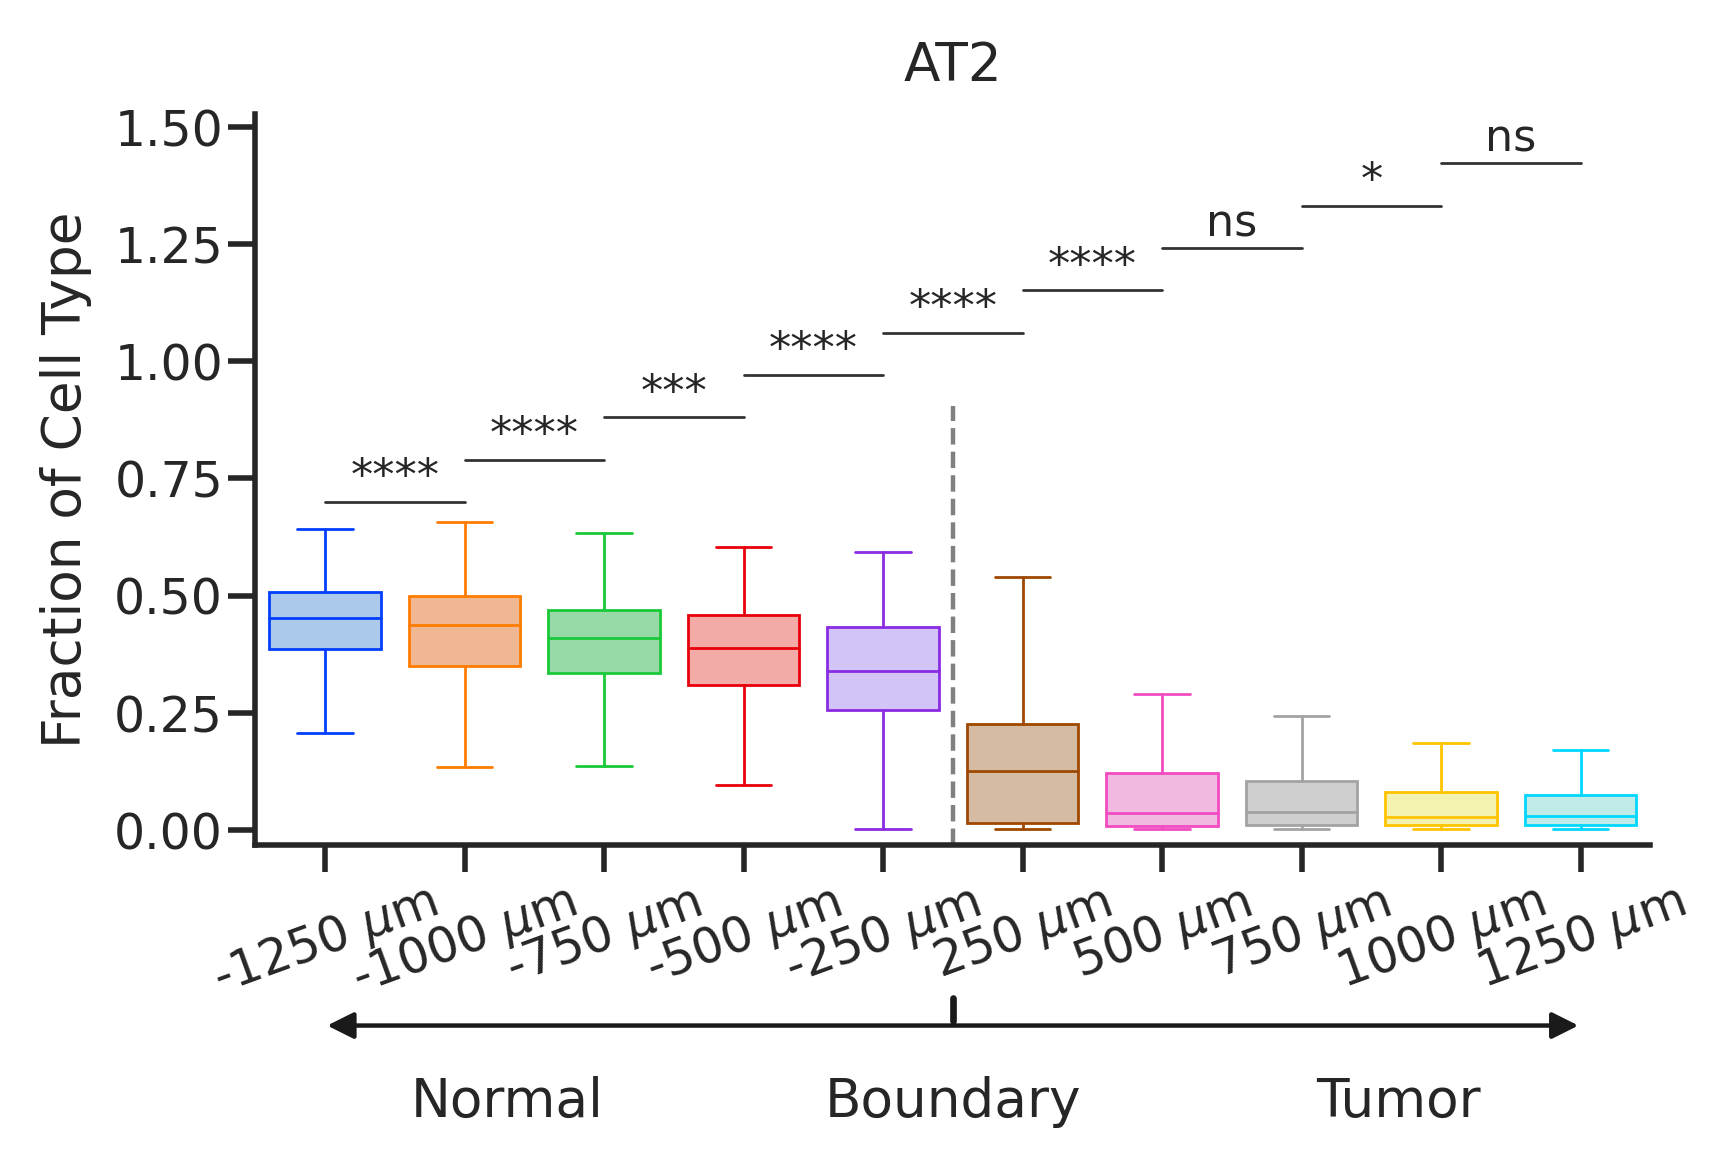

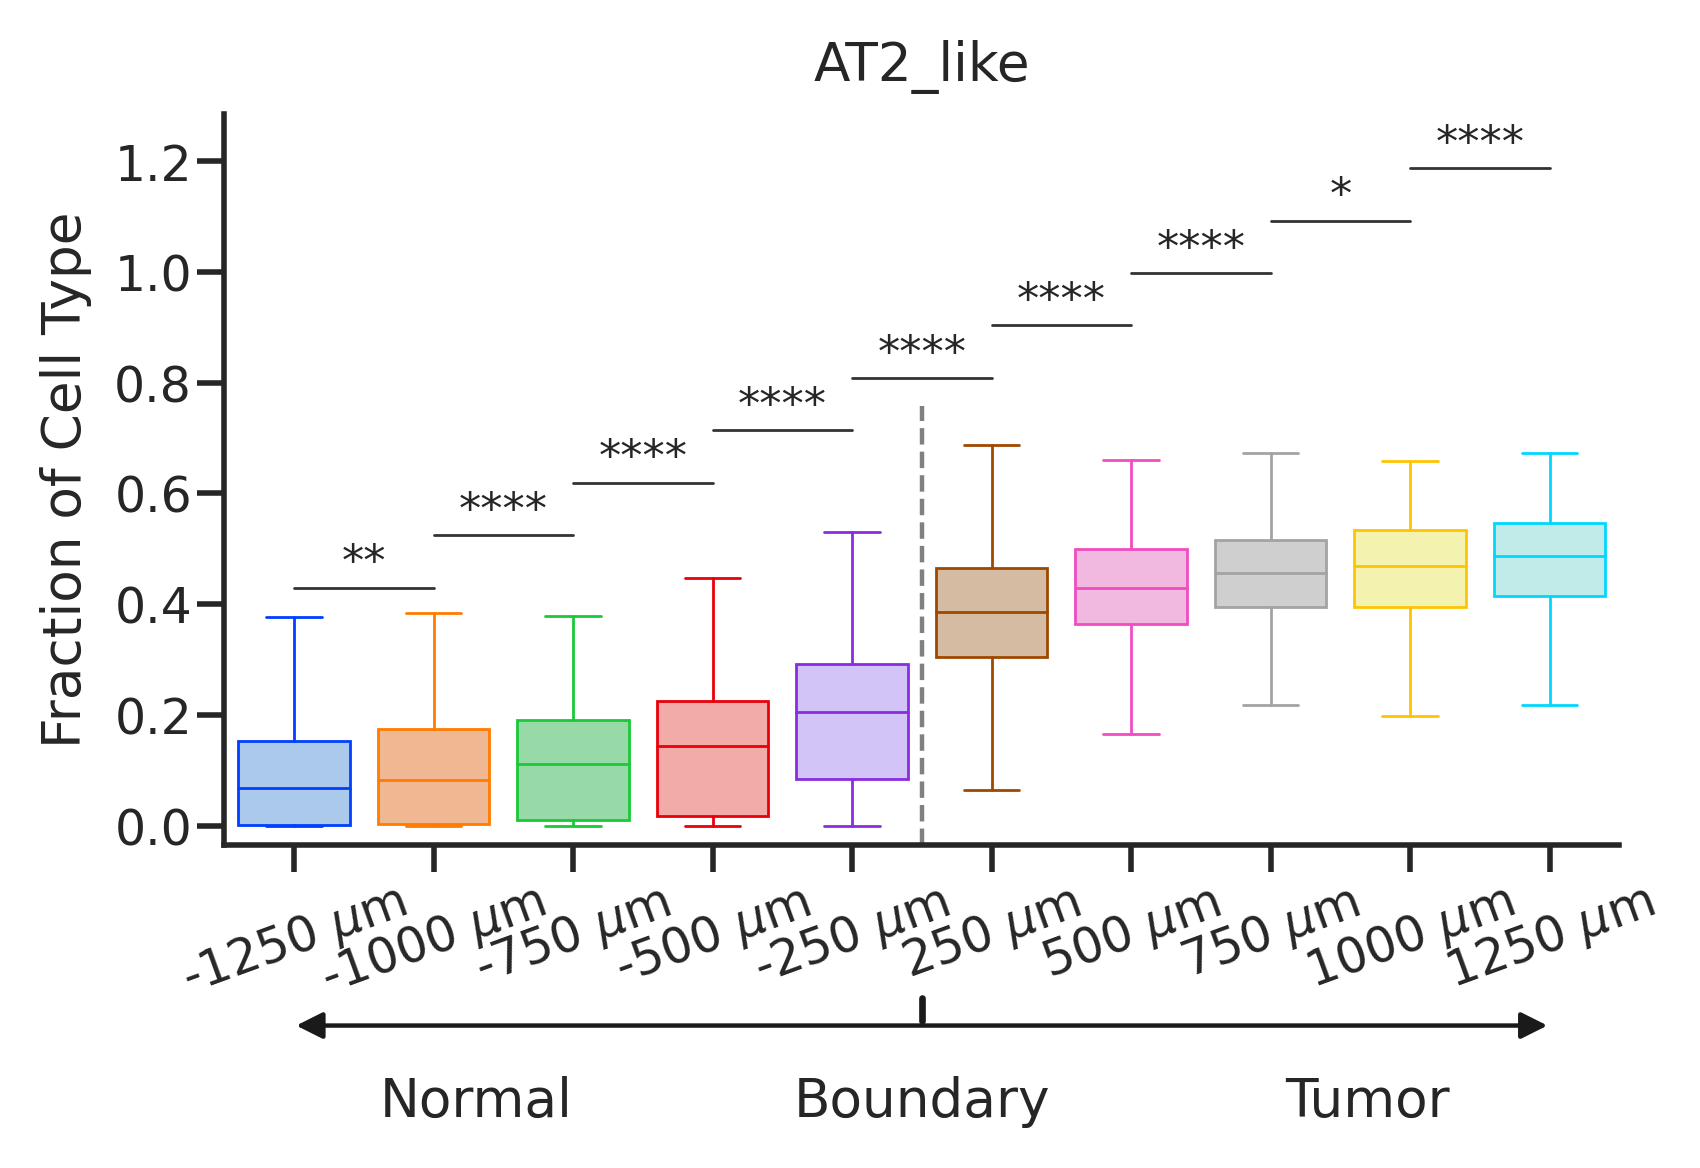

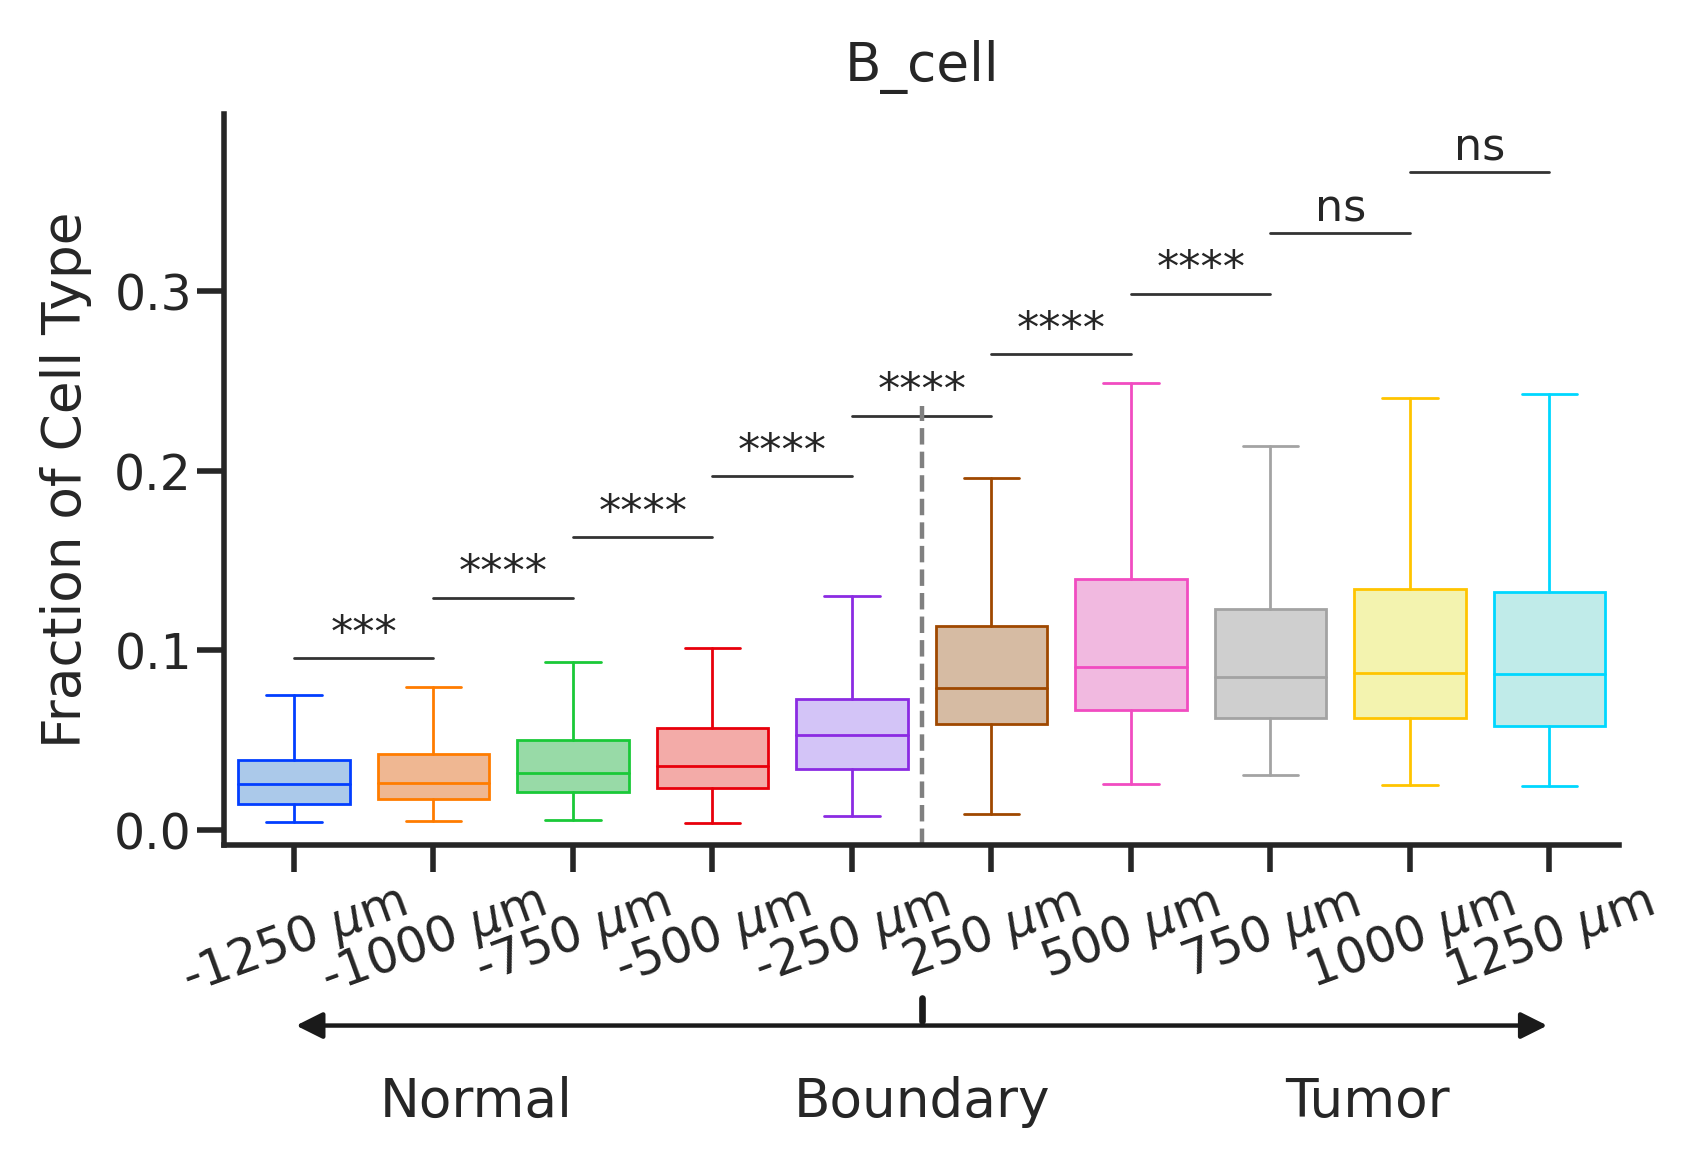

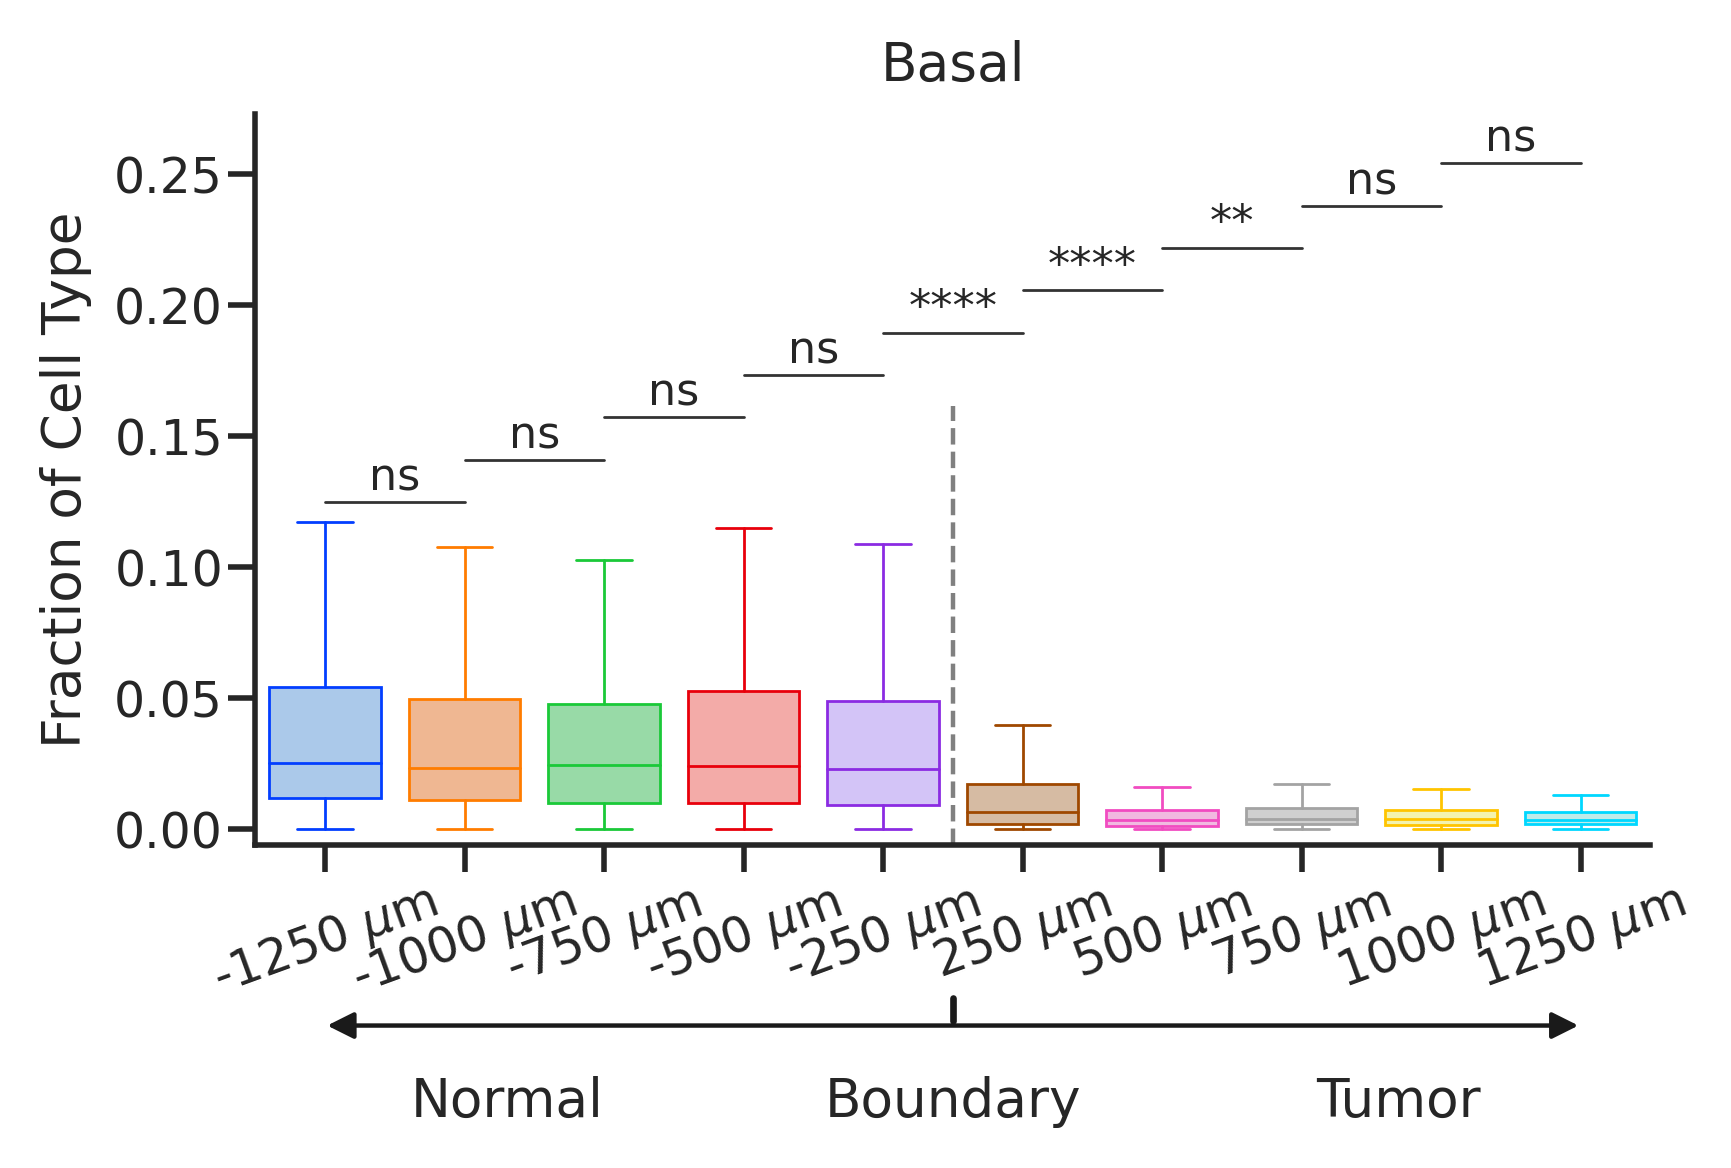

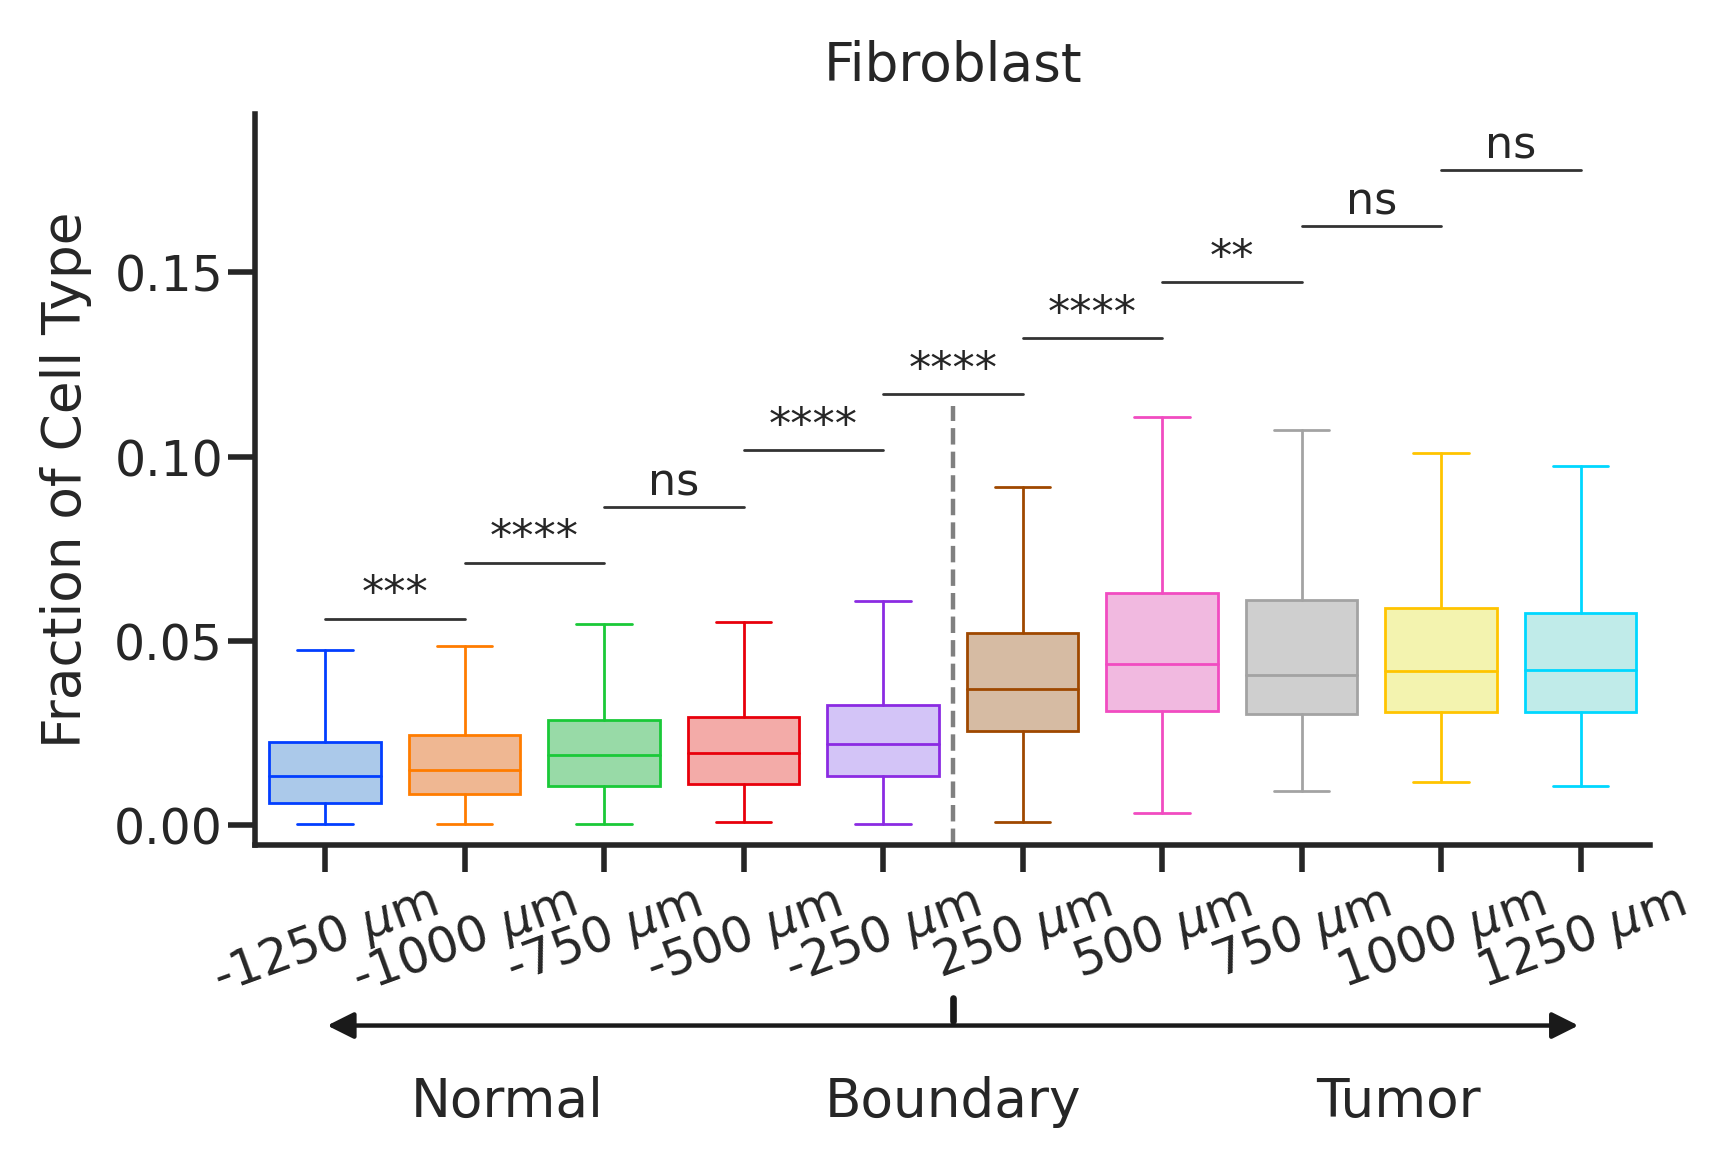

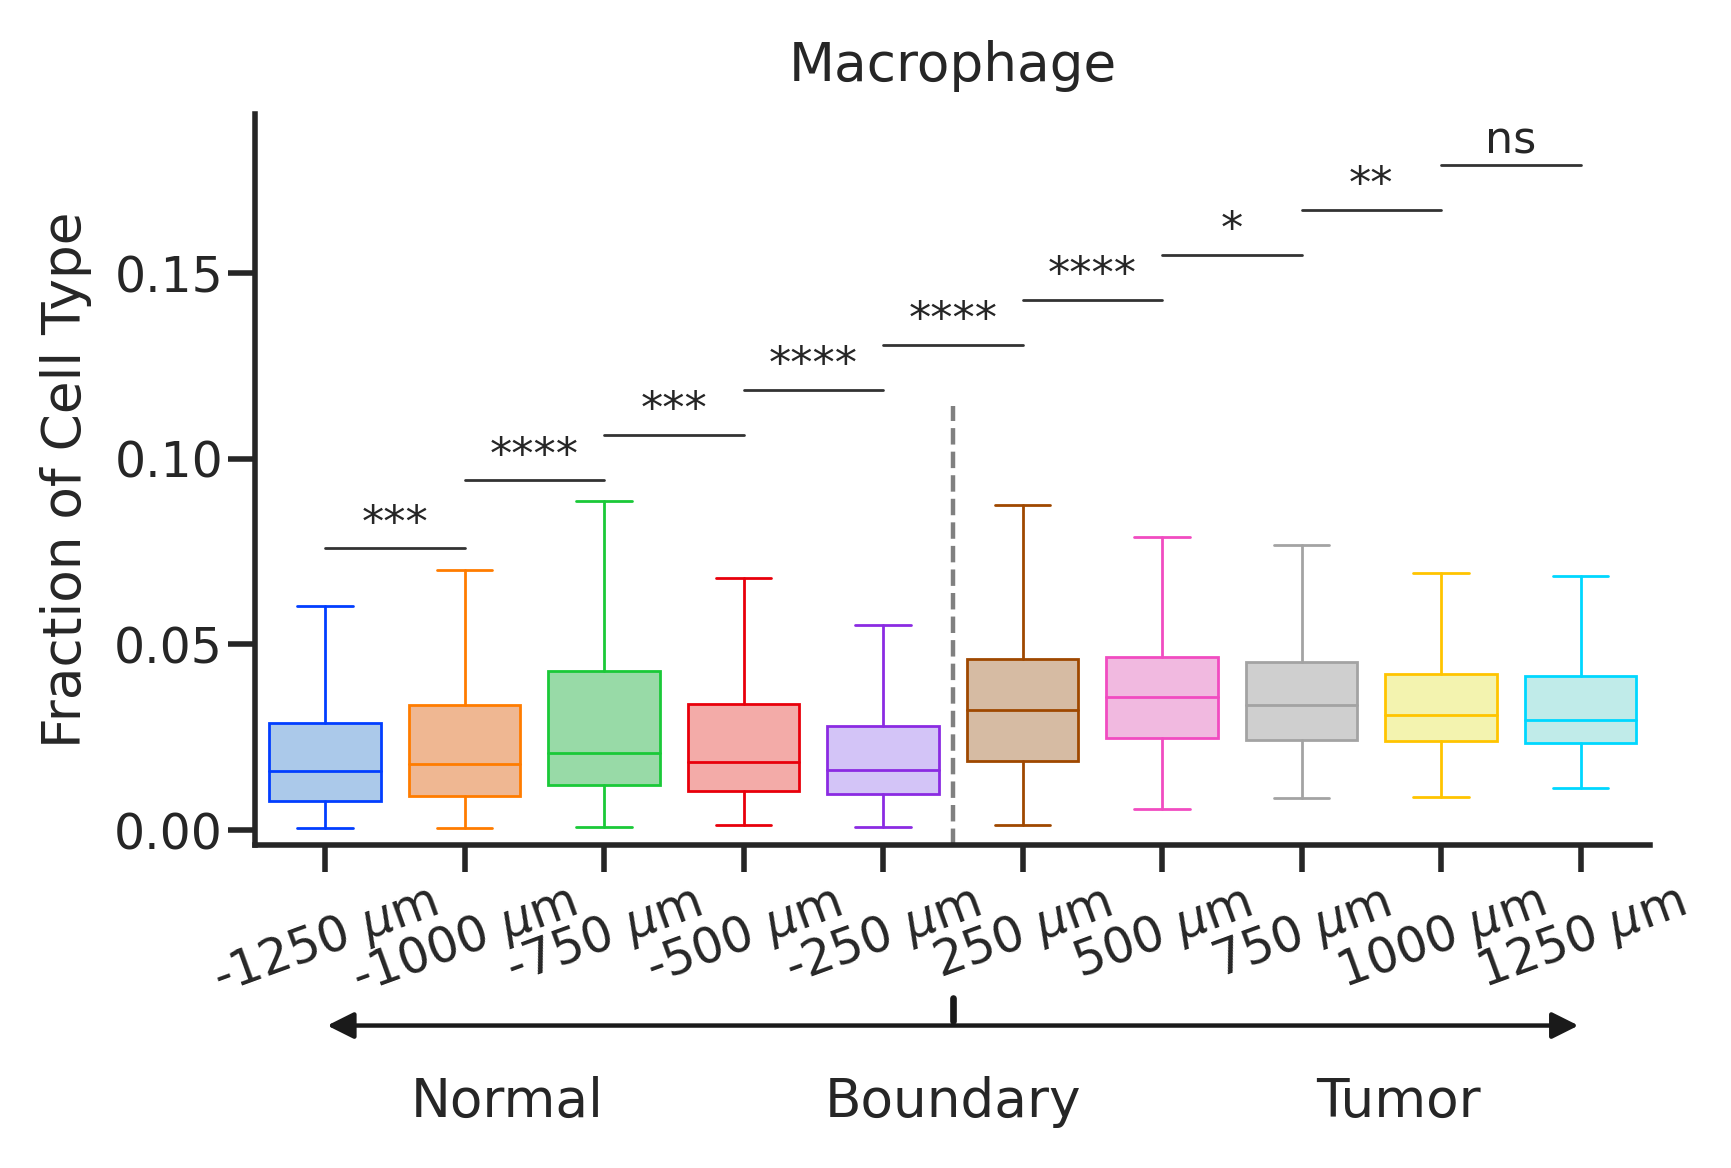

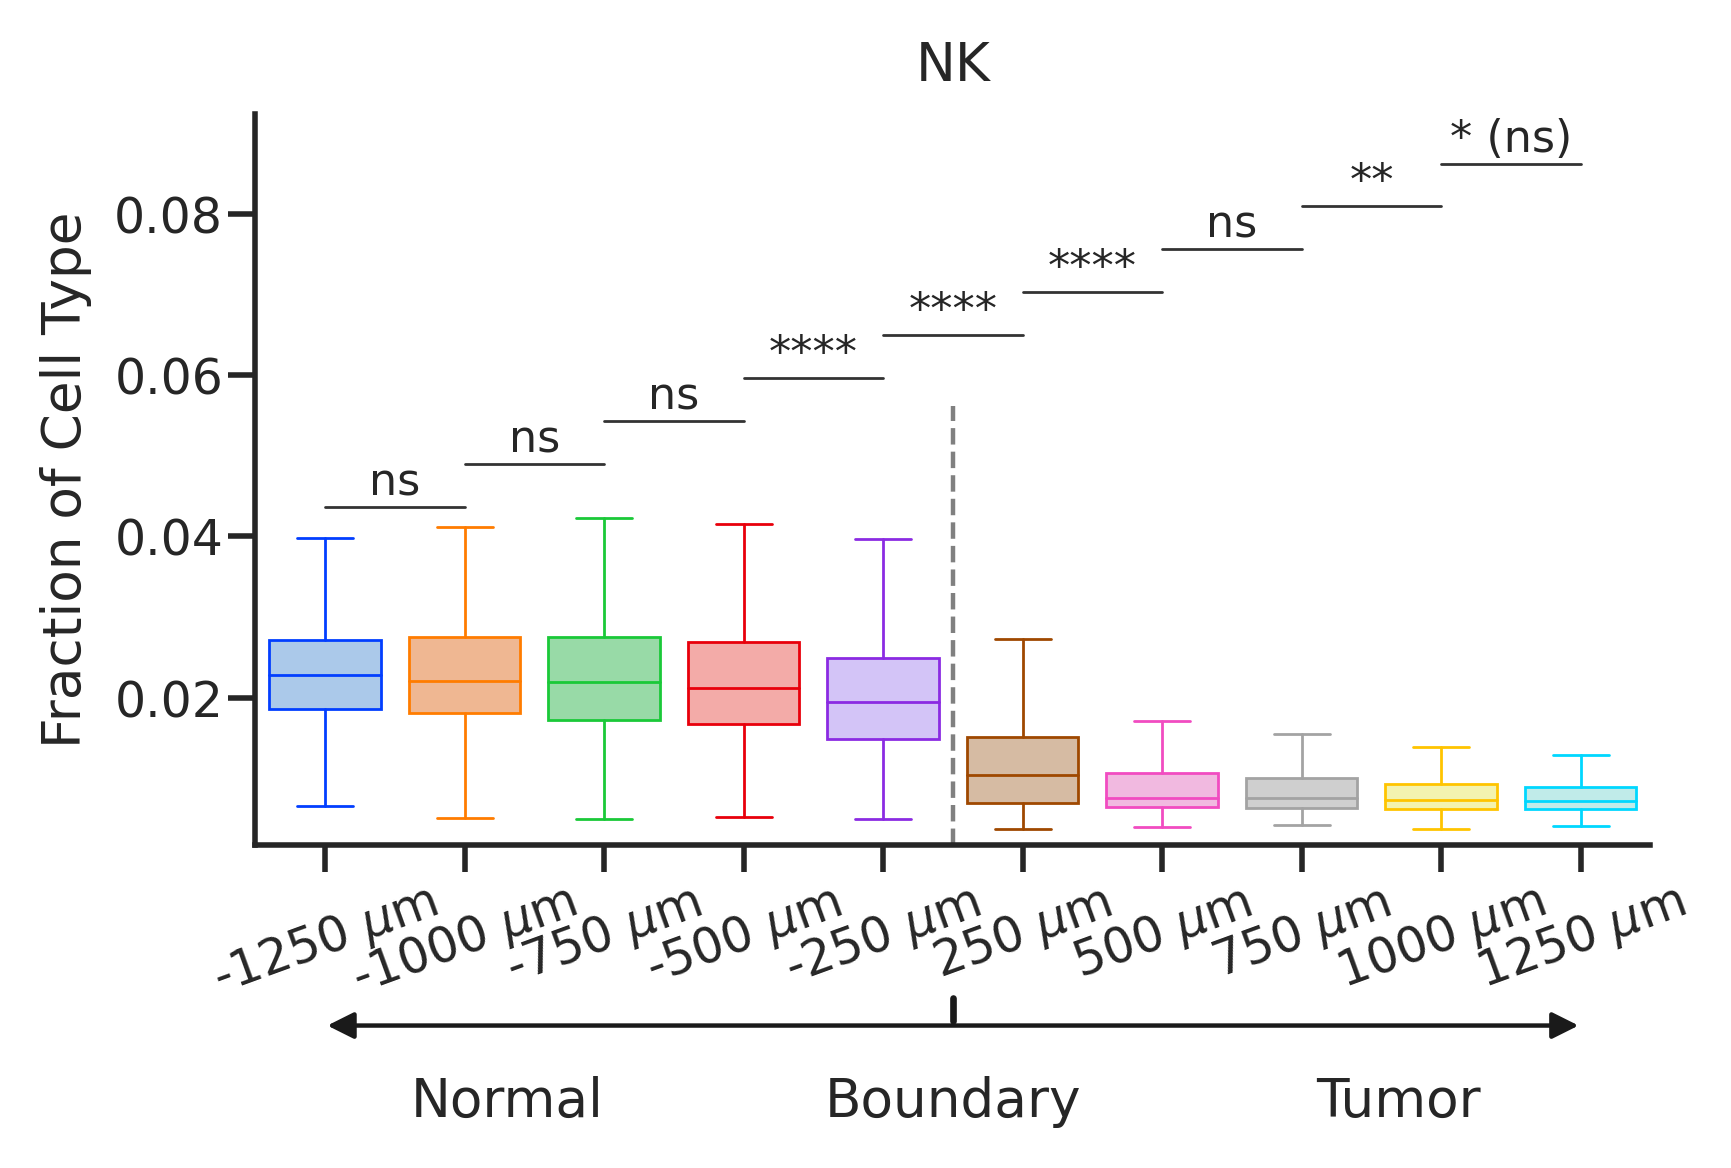

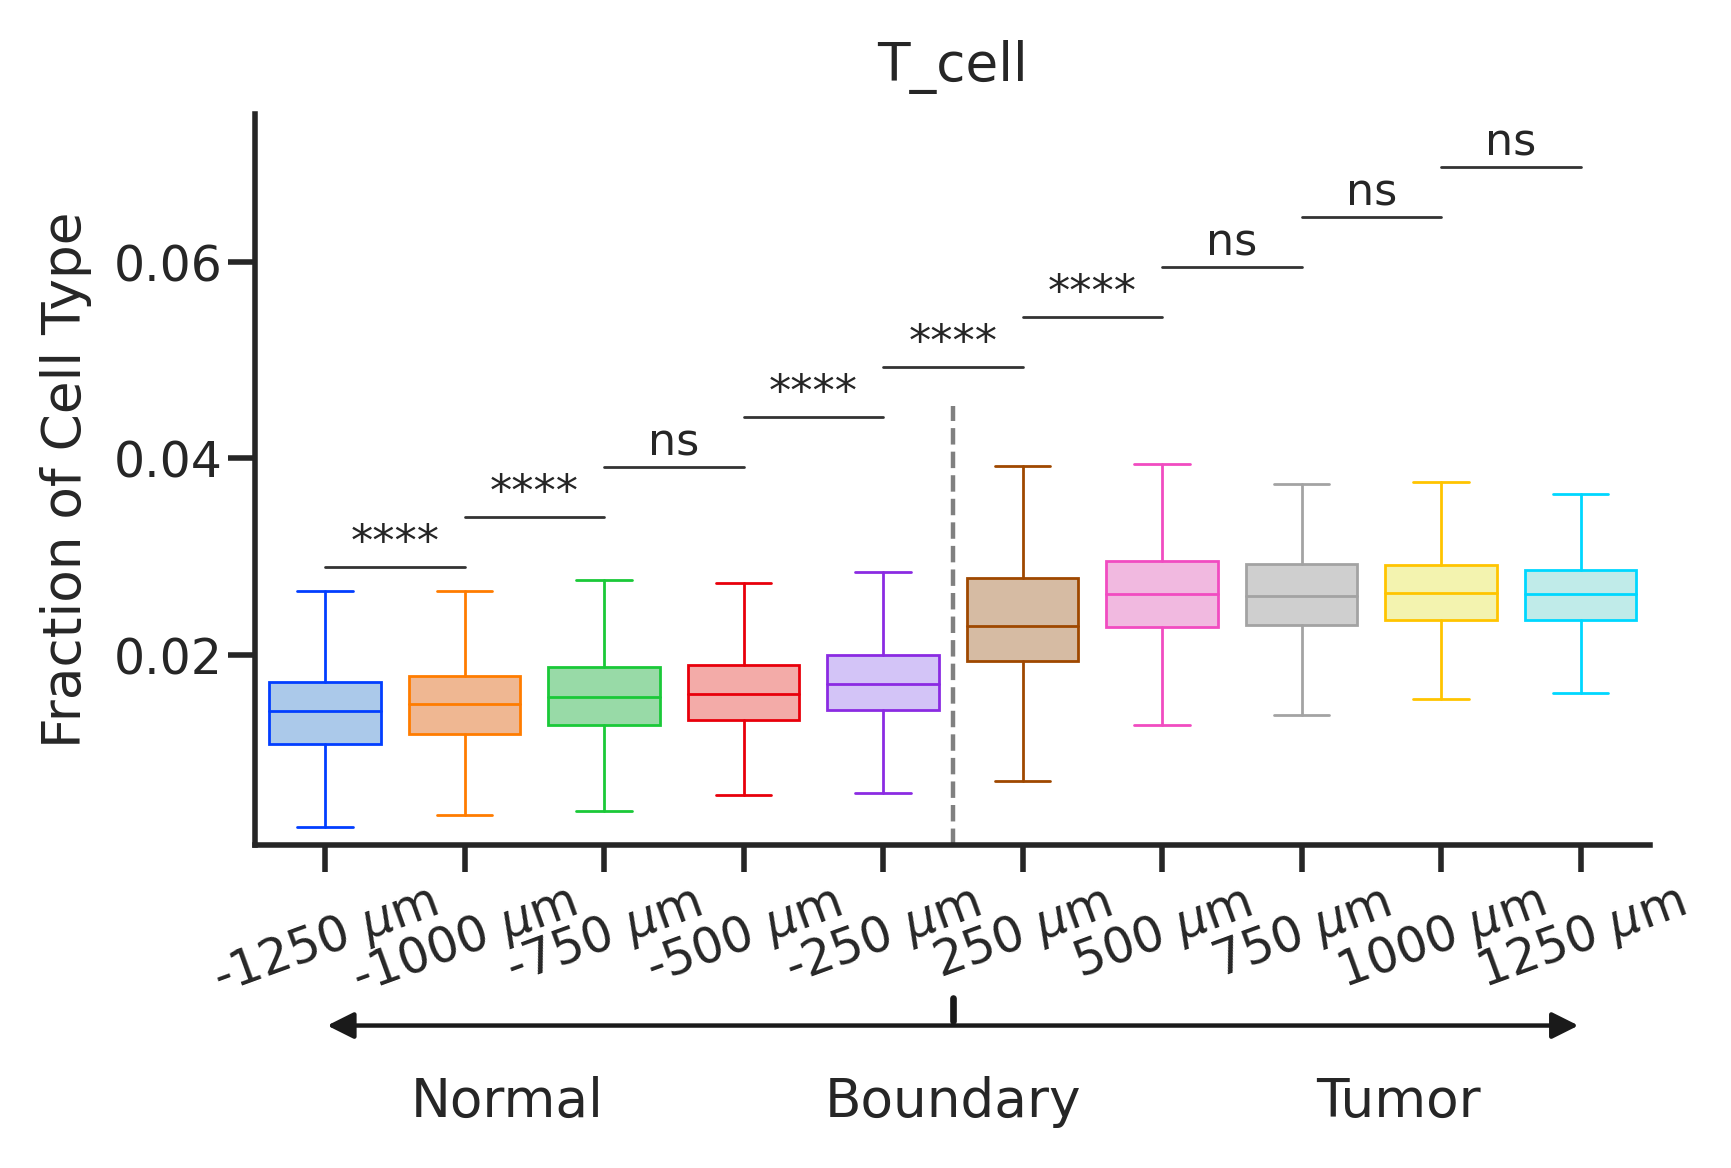

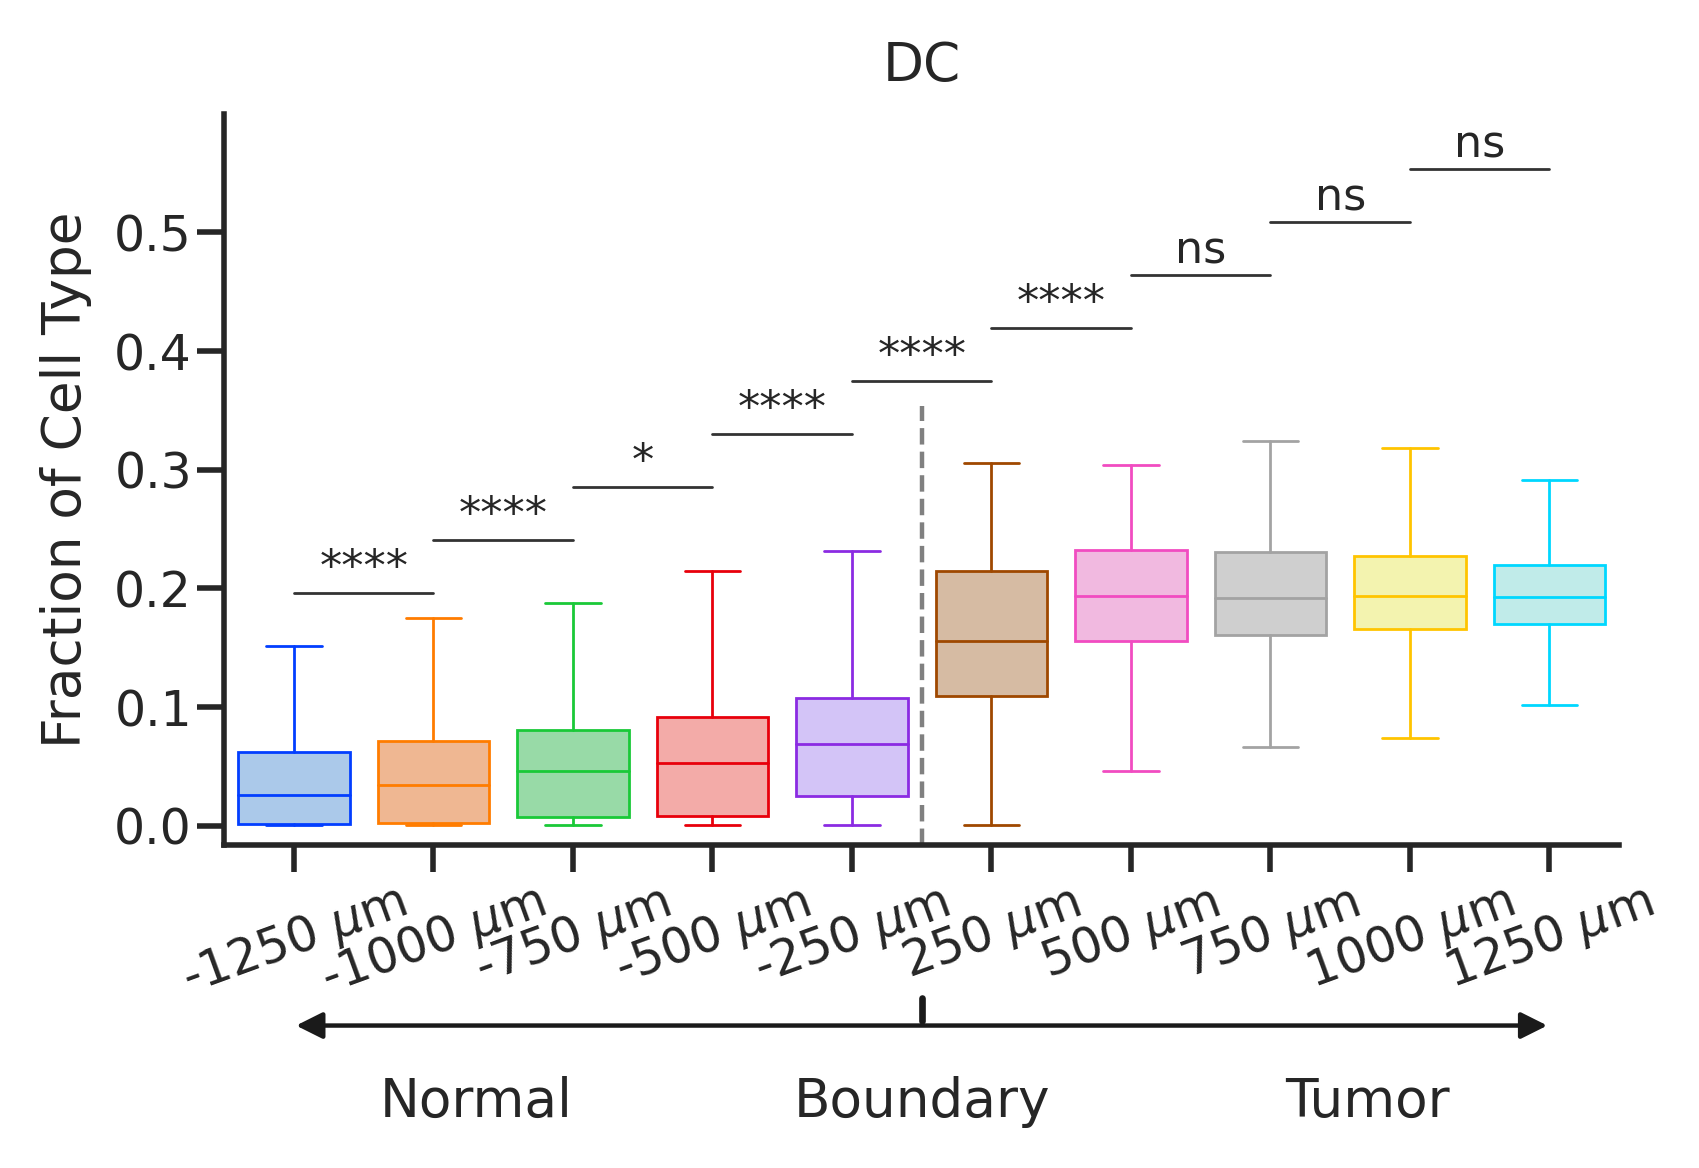

In [120]:
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
cells = ['AT2','AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell','DC']
for cc in cells:
    plot_show(df_cell_type_frac_regs,cc)

# Genes

In [53]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']

gene_dict = {'DC': ['LYZ','HLA-DRB1','IL1B','LST1','HLA-DQA1','HLA-DQB1'],
            'Fibroblast':['LUM','DCN','FBLN1','APOD','COL1A1','IGFBP6','CFD'],
            'Macrophage':['CD68','MARCO','CTSD','C1QA','C1QB','APOC1','APOE'],
            'NK':['NKG7','GZMA','GNLY','CD3G','FGFBP2'],
            'T_cell':['CD2','CD3D','CD3E','CXCR4','IL32'],
             'B_cell':['MS4A1','FKBP11', 'DERL3','CD79A','MZB1','IGHA2'], # no 'IGLL5','IGJ' in data
            'Club':['SCGB1A1','SCGB3A1','PIGR','WFDC2'],
            'Ciliated':['CAPS','TPPP3','C9orf24'],
            'Endothelial':['RAMP2','VWF','GNG11','CLDNS','DARC'],
             'AT1':['RTKN2','EMP2'],
             'AT2':['PIGR', 'WFDC2','SFTA2','NAPSA','SFTPB','SFTPD','SFTPA1','SFTPC'],
             'AT2_like': ['MDK','TIMP1','IFI27','EPCAM','SCGB3A2'],
             'Basal':['KRT15','S100A2'] # no MIR205HG 
            }

In [56]:
adass = [adata_p5_ob.copy(), adata_p10_p5.copy(), adata_p15_p10.copy(), 
         adata_p20_p15.copy(), adata_m5_ob.copy(), adata_m10_m5.copy(), adata_m15_m10.copy(), adata_m20_m15.copy()]
dist_lab = ['0-5','5-10','10-15','15-20', '-5-0', '-10--5','-15--10','-20--15']

celltype_list = ['AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell']

celltype = 'T_cell'
df_gene=None
for i, ada in enumerate(adass):
    i_df_gene = ada[:, gene_dict[celltype]].to_df()
    i_df_gene['region'] = [dist_lab[i]] * i_df_gene.shape[0]
        
    if i==0:
        df_gene = i_df_gene
    else:
        df_gene = pd.concat([df_gene, i_df_gene], ignore_index=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.788e-01 U_stat=3.012e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.580e-01 U_stat=3.774e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.168e-03 U_stat=5.559e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.520e-07 U_stat=1.642e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.616e-08 U_stat=3.939e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.201e-02 U_stat=3.790e+06
-15--10 vs. -20--15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg cor

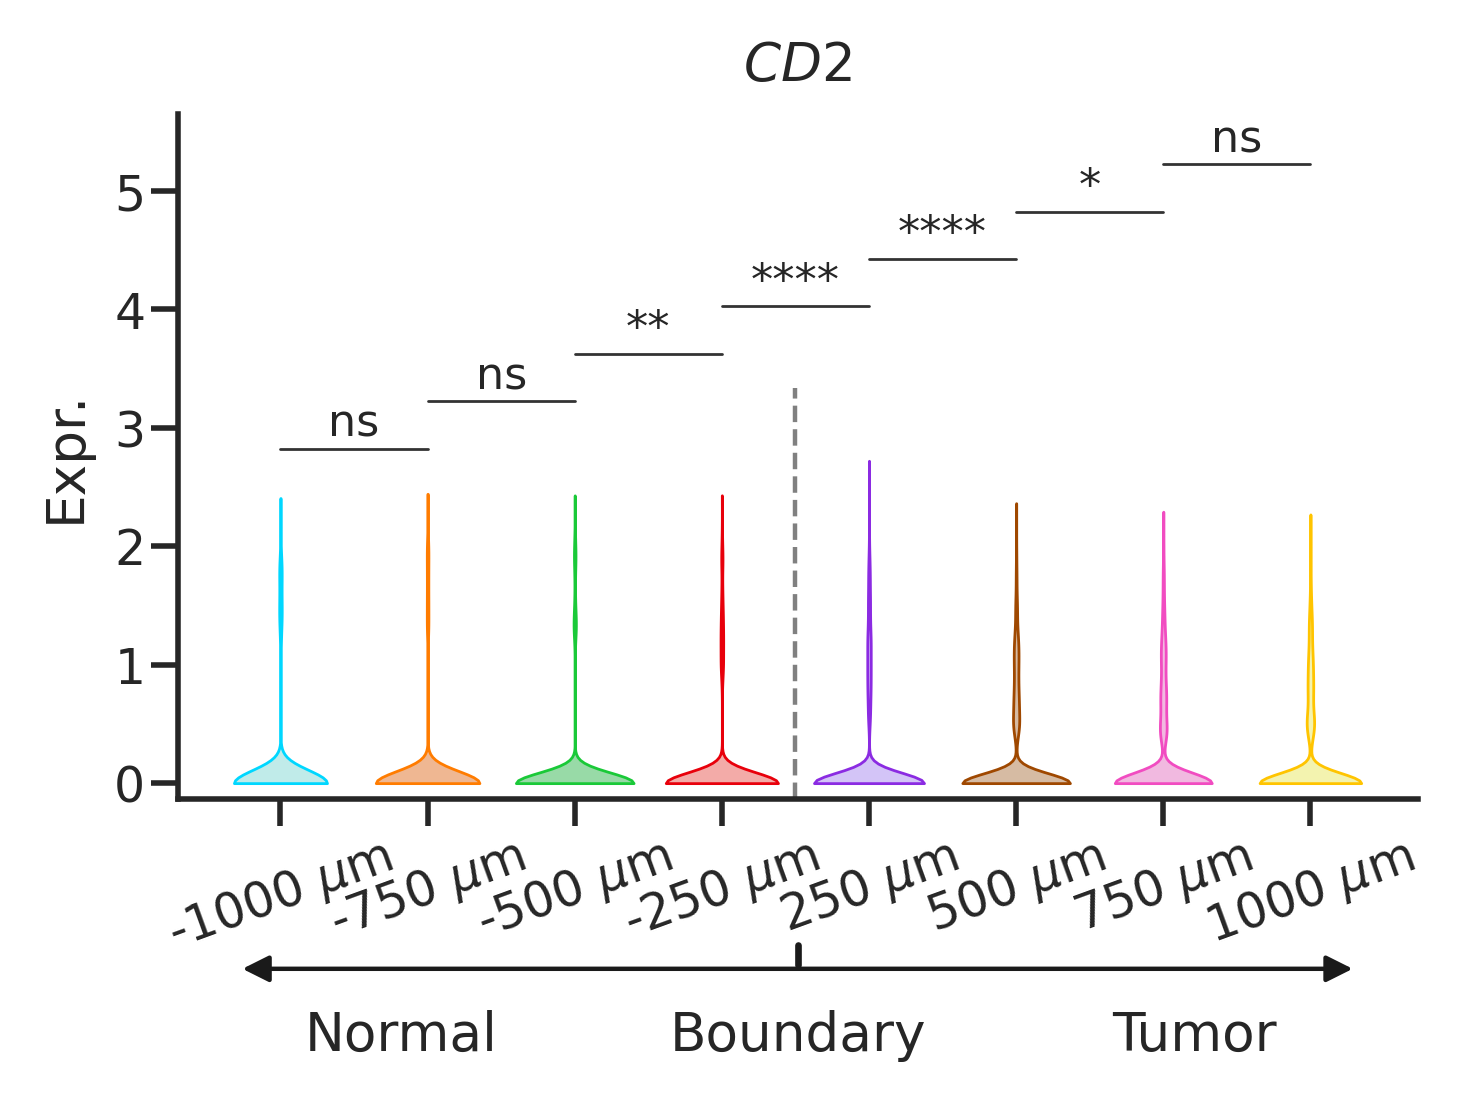

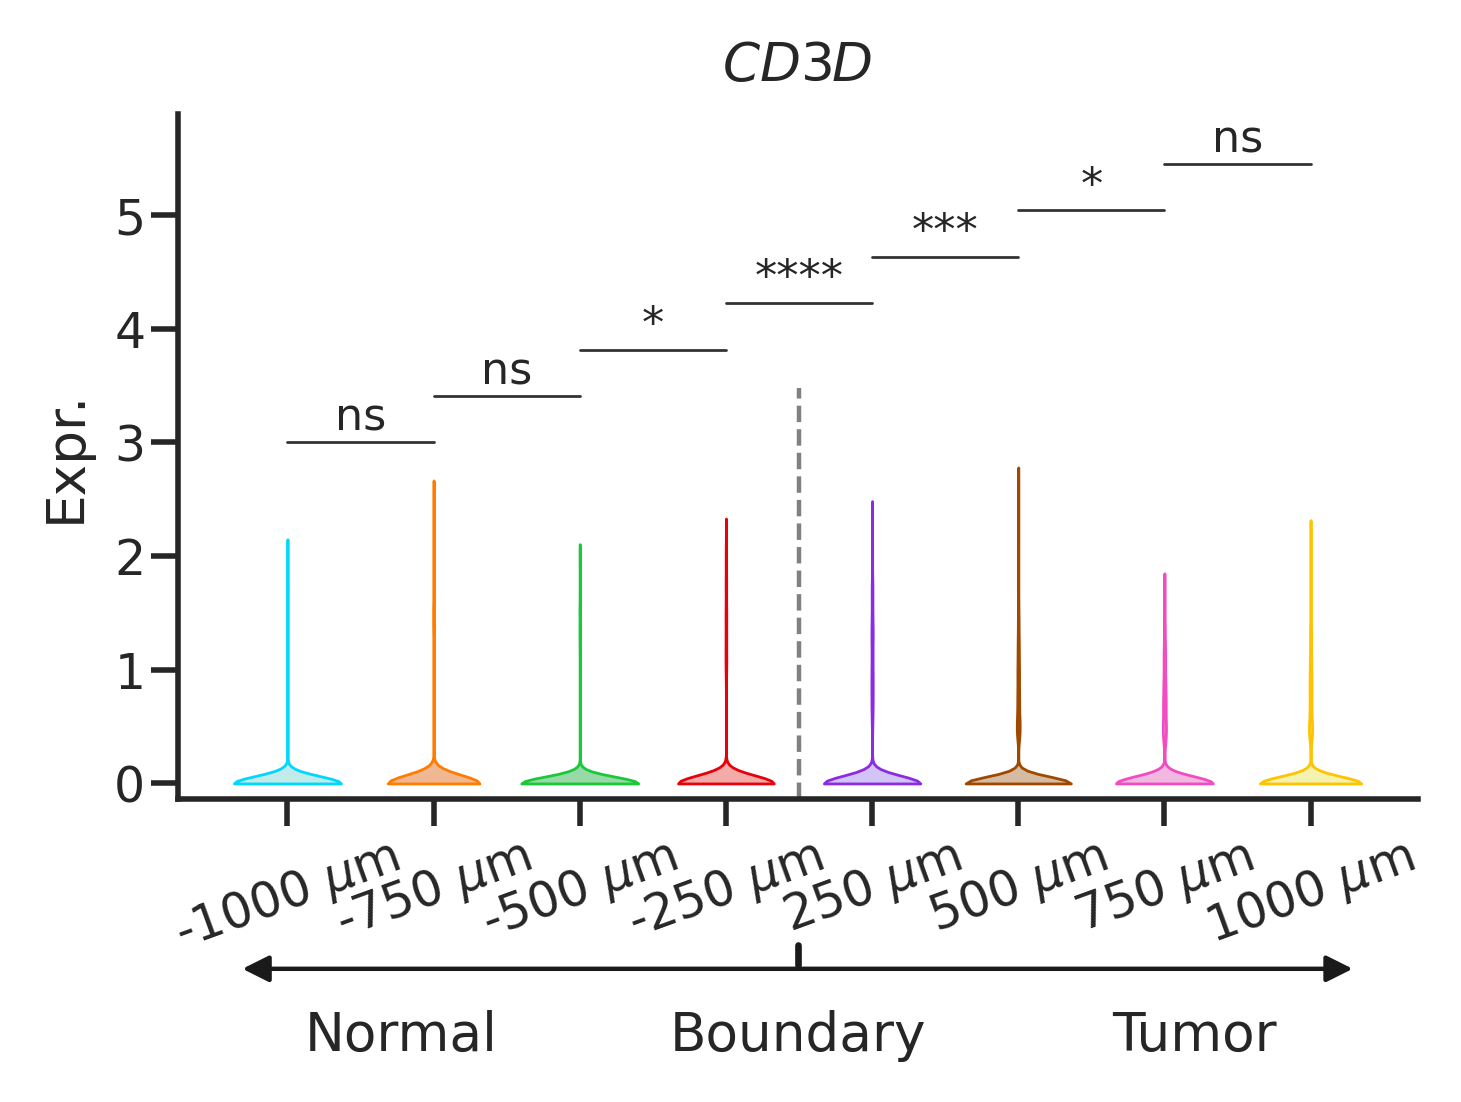

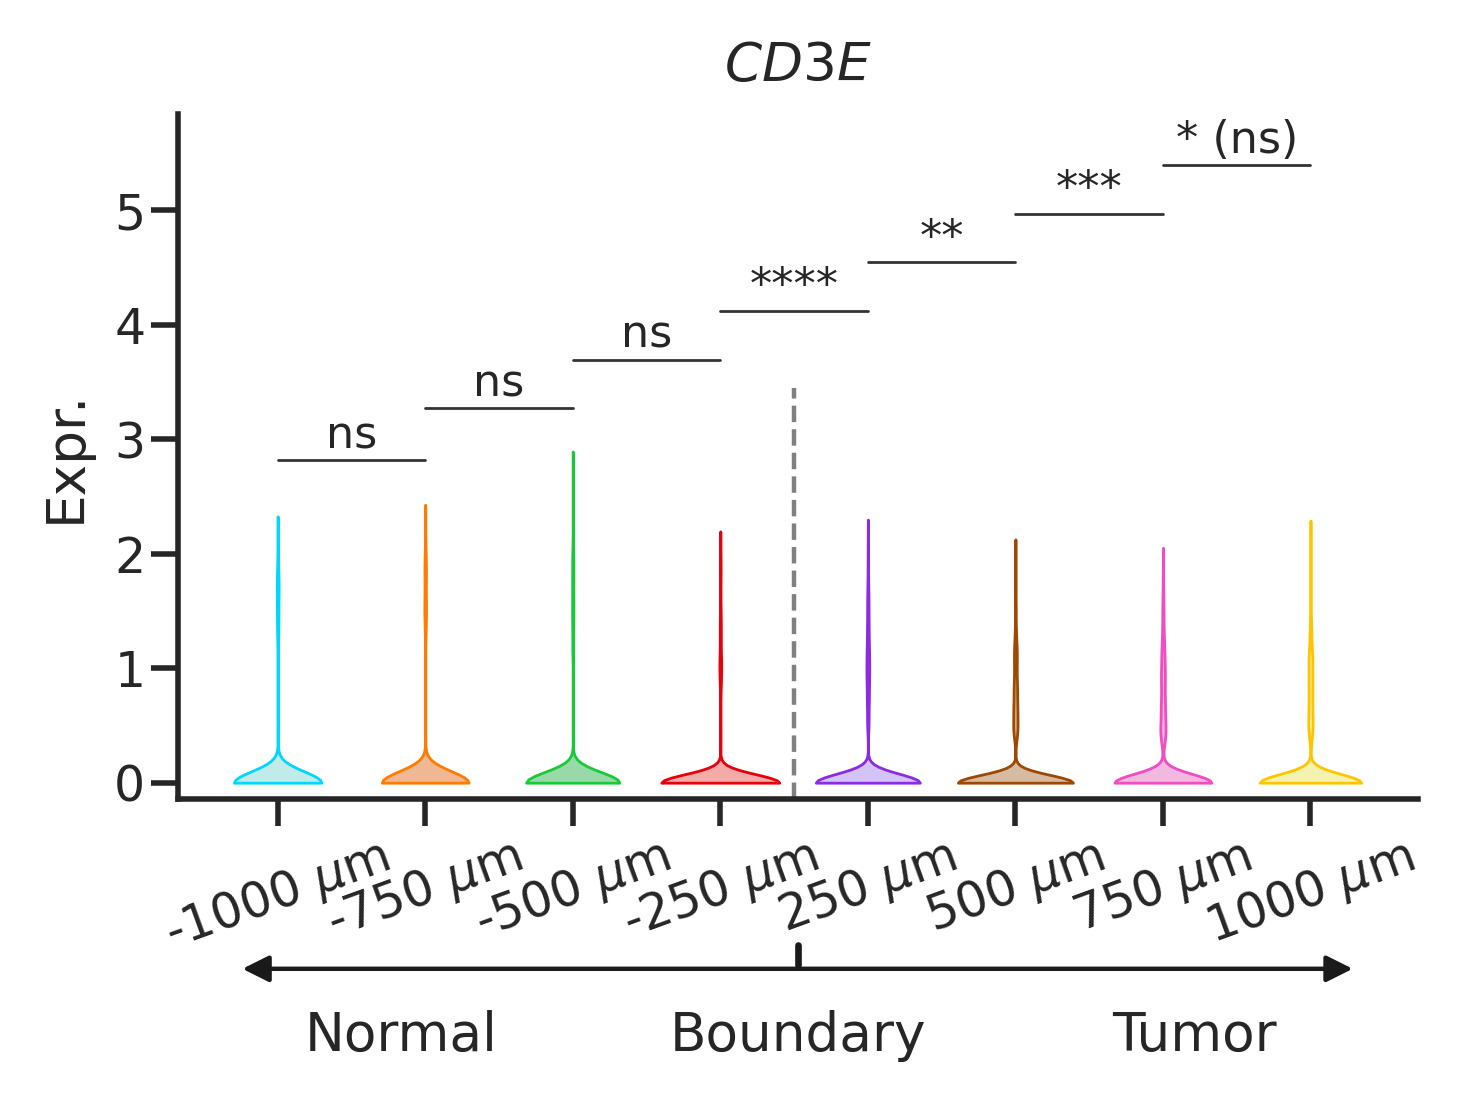

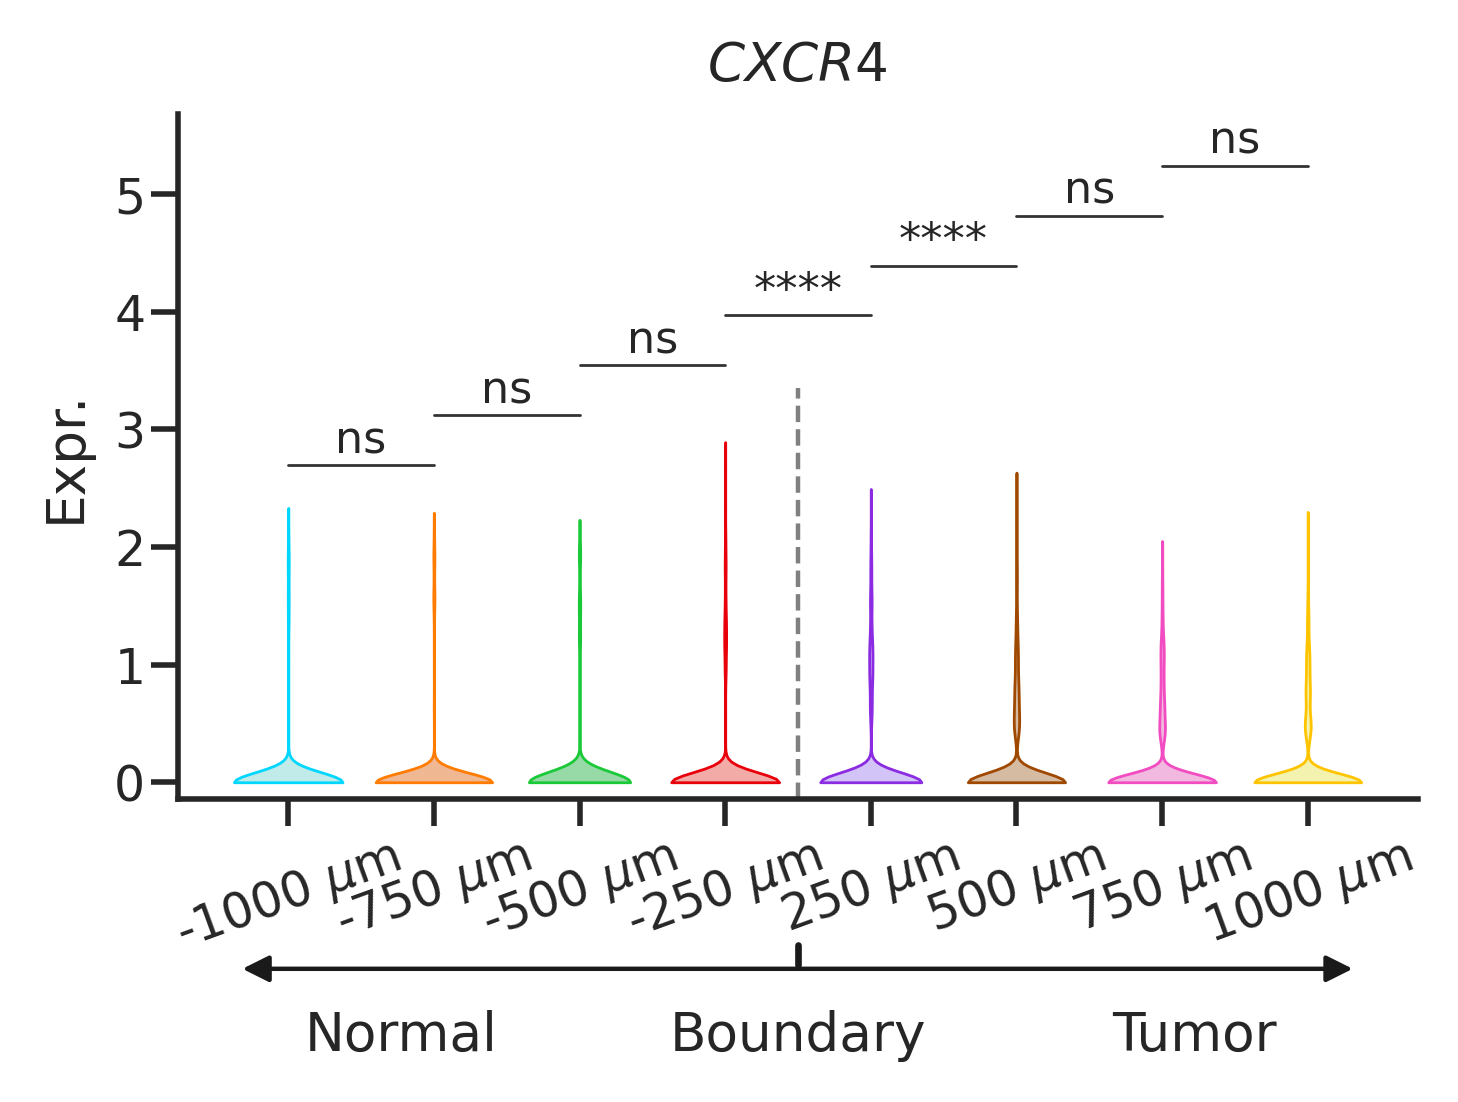

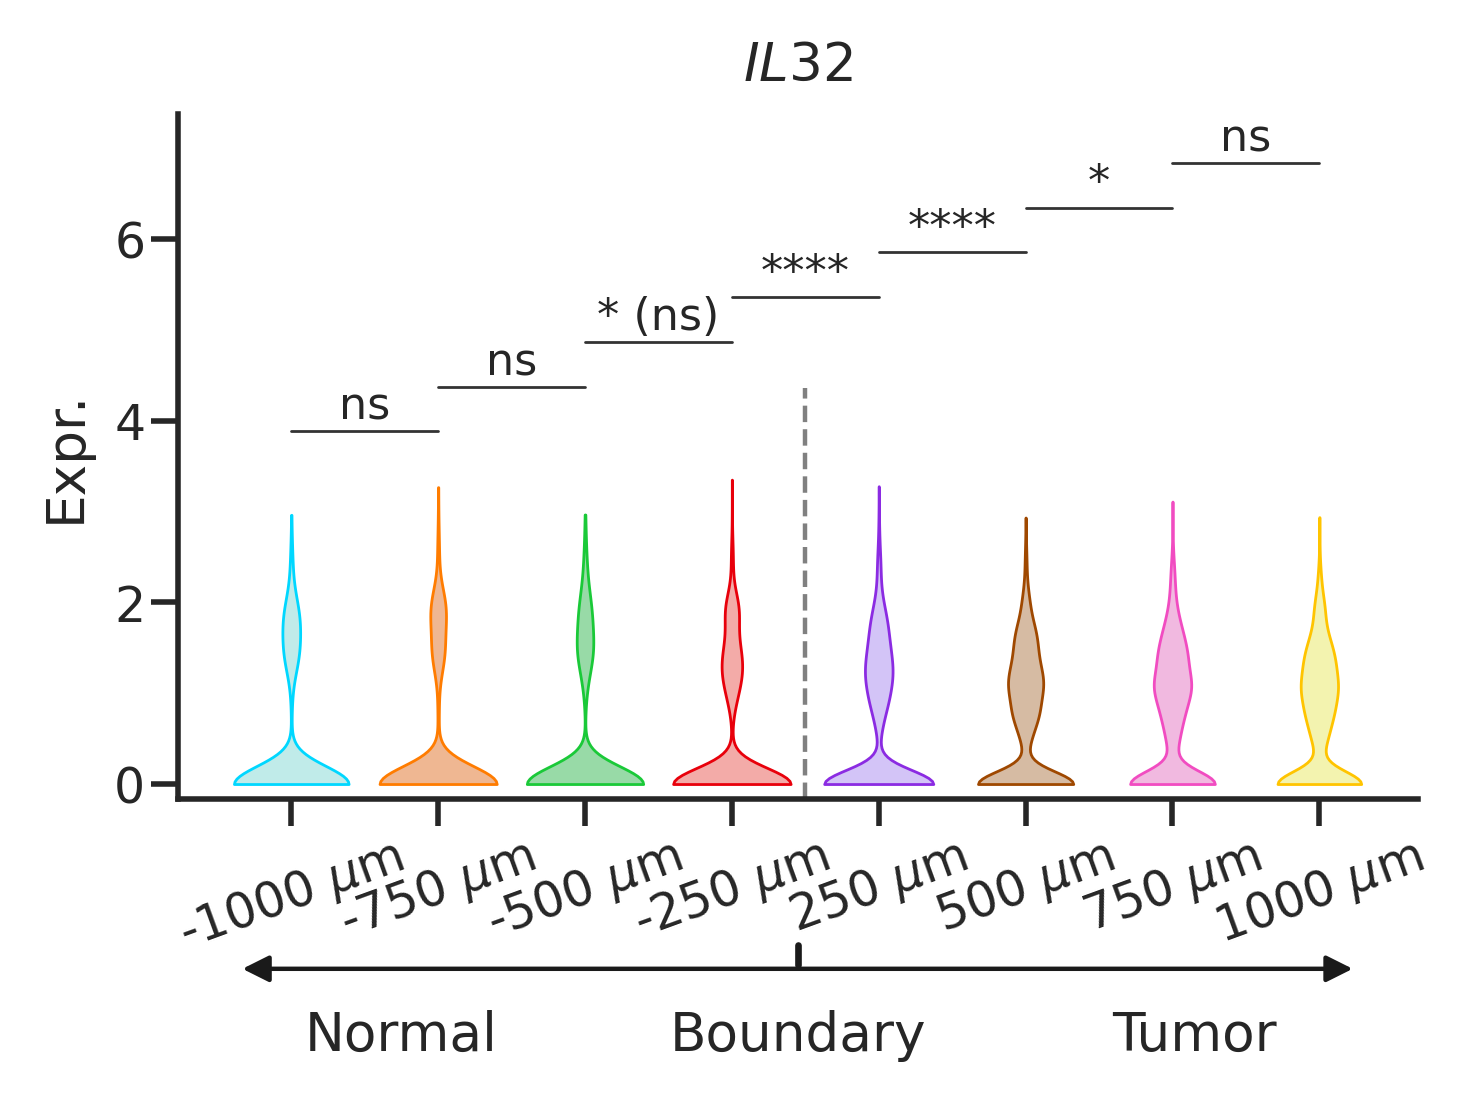

In [57]:
for gene in gene_dict[celltype]:
    plot_show(df_gene, gene, save=True,y_label='Expr.', gene=True, gene_cell_type=celltype)